

## CHAPTER 3 PROCESSING, WRANGLING AND DATA VISUALIZATION.
### DATA VISUALIZATION 
In this notebook, I will explore the art and science of data visualization using Python. Data visualization is a crucial aspect of data analysis as it helps us to understand the underlying patterns, trends, and relationships within our data. By creating insightful and visually appealing visualizations, we can effectively communicate our findings and insights to others.

I will cover various techniques and libraries for data visualization in Python, including matplotlib, seaborn, and plotly. Through hands-on examples and exercises, you will learn how to create various types of plots and charts, customize their appearance, and interpret the results.

##### *Jose Ruben Garcia Garcia*
##### *Frebuary 2024*
##### *Reference: Practical Machine learning python problems solver*

In [5]:
#Importing libraries. 
%matplotlib inline
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

## Visualizing with pandas module

#### Preparing the dataset 
For this example we are going to use a dataset created with random data generated with a function build and based on a previous notebook available in the folder. The function even has lines of code to clean the data inside the dataset in order to only show the basics steps learned. 

In [6]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10)) + product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

In [7]:
df = generate_sample_data(row_count=1000)
cleanup_column_names(df)

df['date'] = pd.to_datetime(df.date)


df['user_class'] = df['user_type'].map(expand_user_type)

df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                            if not pd.isnull(dt.week) 
                                            else 0)

df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                            inplace=True)

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_17732/498853860.py:37: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y")
/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_17732/3072529884.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week


In [9]:
df.tail()

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
995,1995,2016-02-02,5716,714,9,2407.70,b,new,5
996,1996,2016-01-17,5923,1020,21,2834.44,c,existing,2
997,1997,2016-01-04,5730,941,27,792.91,d,loyal_existing,1
998,1998,2016-02-01,5624,512,7,1527.31,b,new,5
999,1999,2016-02-02,5940,254,27,45.37,b,new,5


#### Understanding data

#### The dataset that was created previously describes transactions having the following attributes/features/properties:
#### • Date: The date of the transaction
#### • Price: The price of the product purchased
#### • Product ID: Product identification number
#### • Quantity Purchased: The quantity of product purchased in this transaction
#### • Serial No: The transaction serial number
#### • User ID: Identification number for user performing the transaction
#### • User Type: The type of user

### Line charts 

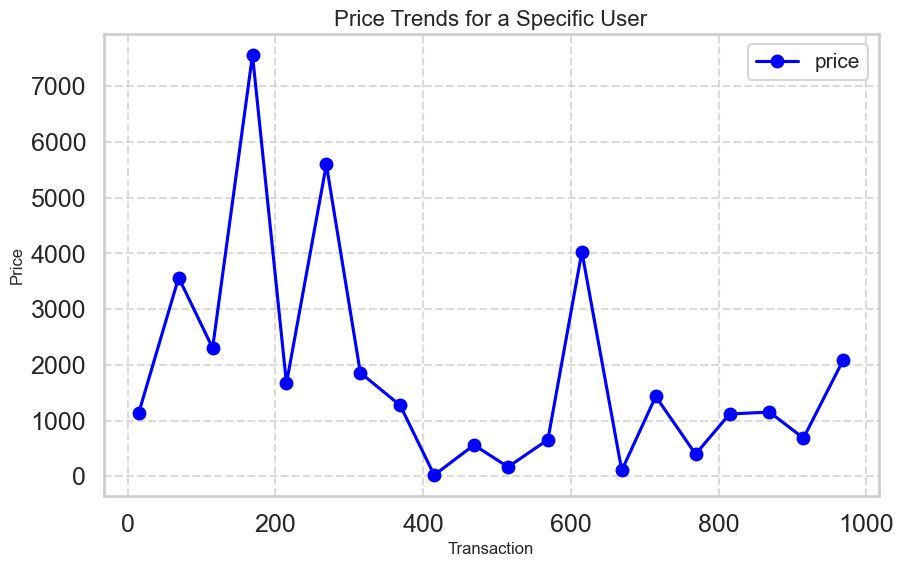

In [12]:
#Looking at the purchase patterns of a user who has a maximum number of transactions.
# Looking at the purchase patterns of a user who has a maximum number of transactions.
max_user_id = df.user_id.value_counts().index[0]
ax = df[df.user_id == max_user_id][['price']].plot(style='blue', marker='o', figsize=(10, 6))
ax.set_title('Price Trends for a Specific User', fontsize=16)
ax.set_xlabel('Transaction', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

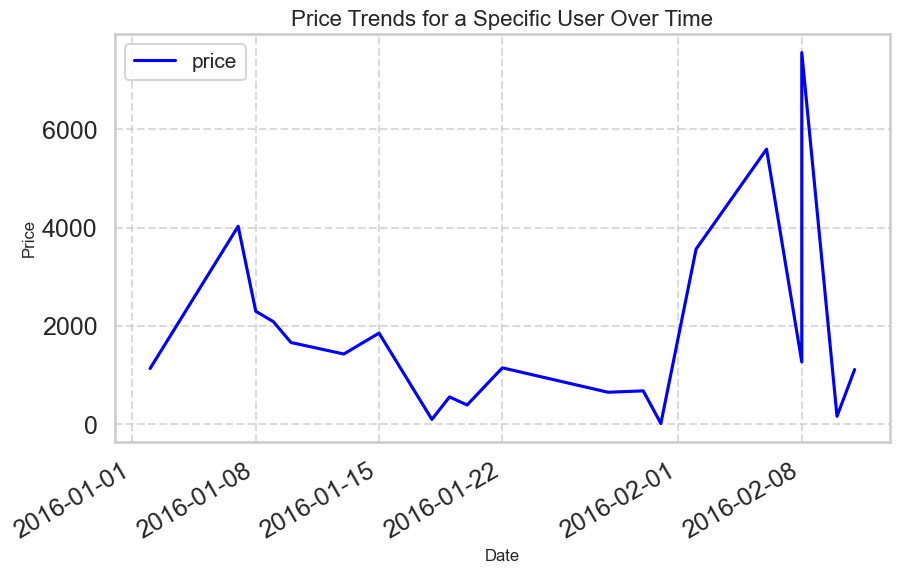

In [15]:
# Representation of different transactions over time. Here we inform to pandas what will be the x and y axis.
transactions_data = df[df.user_id == max_user_id]
ax = transactions_data.plot(x='date', y='price', style='blue', figsize=(10, 6))
ax.set_title('Price Trends for a Specific User Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Bar plots

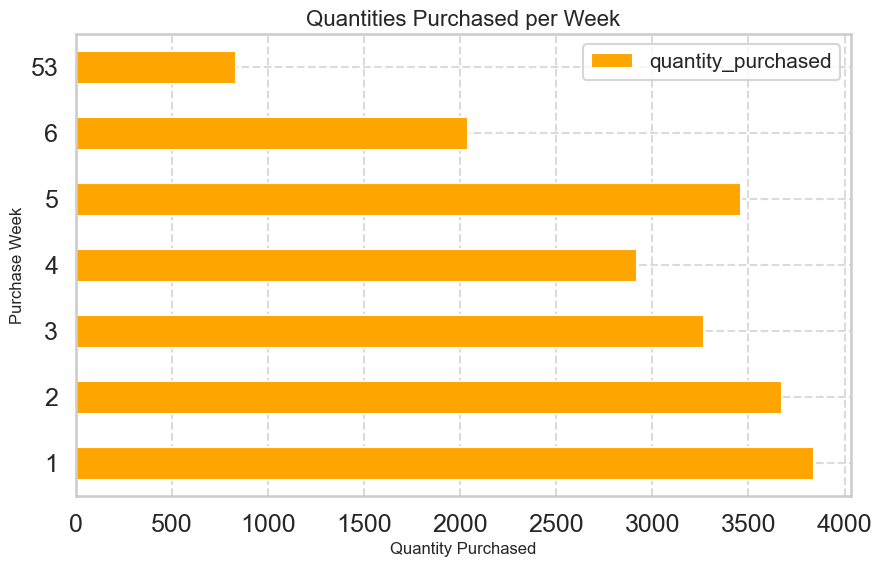

In [19]:
#Creating an horizontal bar plot with agreggated data. 

# Grouping by purchase week and summing up quantities purchased.
quantities_per_week = df[['purchase_week', 'quantity_purchased']].groupby('purchase_week').sum()

# Plotting the horizontal bar chart.
ax = quantities_per_week.plot.barh(color='orange', figsize=(10, 6))
ax.set_title('Quantities Purchased per Week', fontsize=16)
ax.set_xlabel('Quantity Purchased', fontsize=12)
ax.set_ylabel('Purchase Week', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

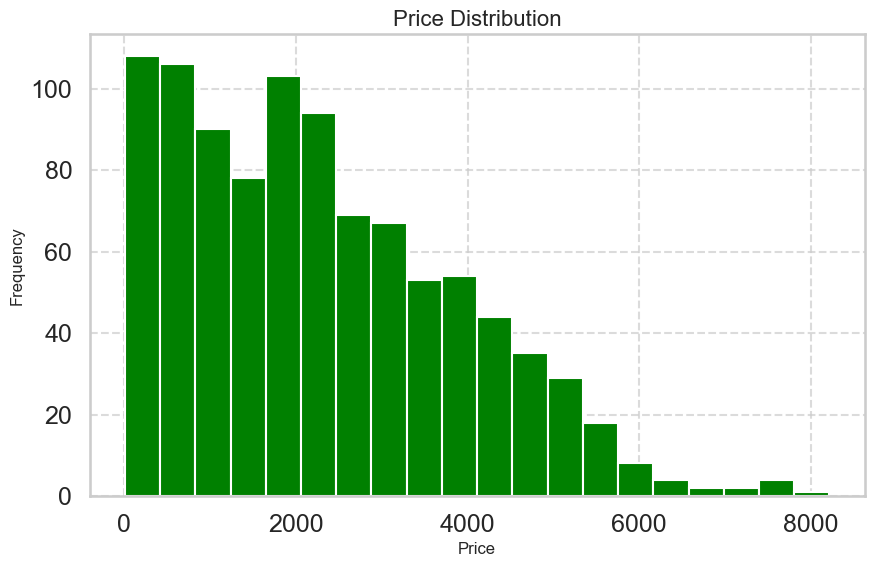

In [22]:
### Histograms to see the distribution  of numerical values. This case is representing the price distribution.
# Plotting the histogram for price distribution.
ax = df.price.hist(color='green', bins=20, figsize=(10, 6))
ax.set_title('Price Distribution', fontsize=16)
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()



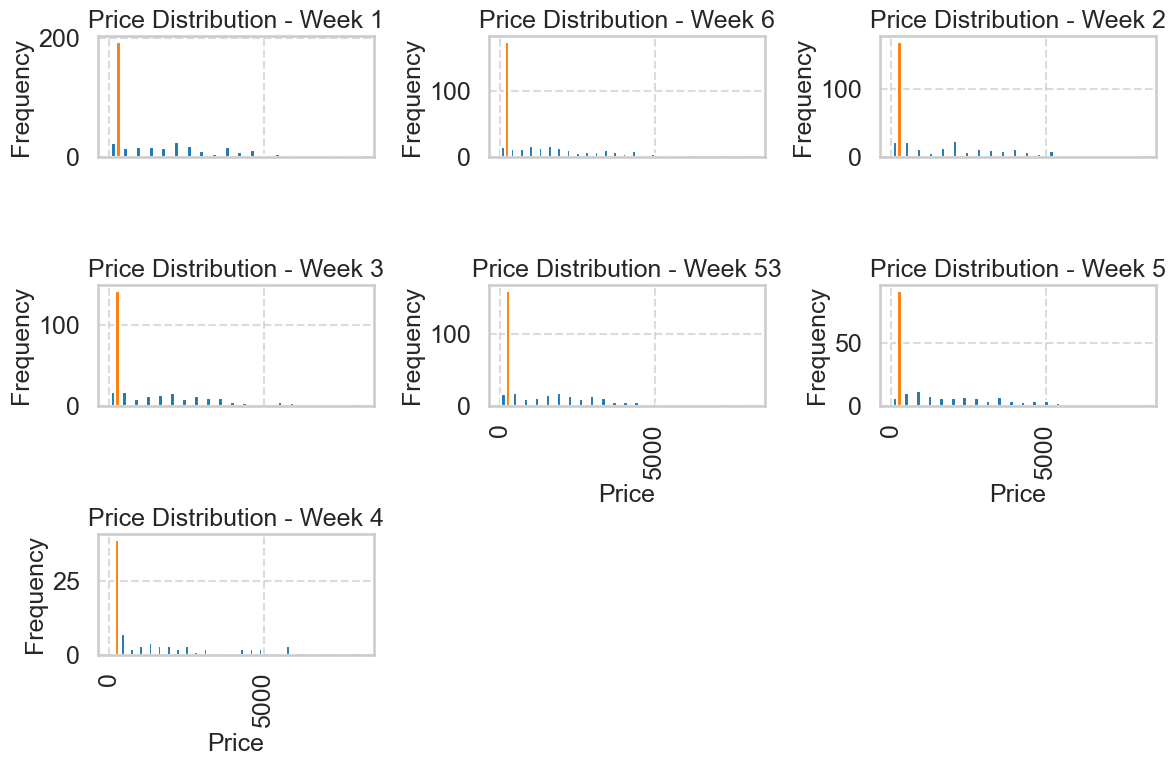

In [27]:
#information can be plot splitting the graphs by week. This parameter help us to group data base in an attribute
# Plotting histograms for price distribution split by week.
axarr = df[['price','purchase_week']].hist(by='purchase_week', sharex=True, figsize=(12, 8), bins=20)
for ax, week in zip(axarr.ravel(), df['purchase_week'].unique()):
    ax.set_title(f'Price Distribution - Week {week}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pie charts

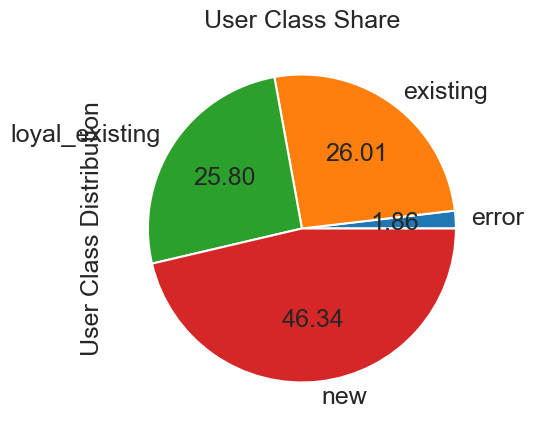

'\nThe distribution of user classes provides insights into the composition of the user base. \nThis pie chart visualizes the proportion of users belonging to each class, \nmaking it easy to identify the most prevalent user class and understand \nthe overall distribution across different user segments.\n'

In [30]:
import matplotlib.pyplot as plt

# Calculating the size of each user class group
class_series = df.groupby('user_class').size()

# Renaming the series for better readability
class_series.name = 'User Class Distribution'

# Plotting a pie chart to visualize the distribution of user classes
class_series.plot.pie(autopct='%.2f')

# Adding a title to the plot
plt.title('User Class Share')

# Displaying the plot
plt.show()
"""
The distribution of user classes provides insights into the composition of the user base. 
This pie chart visualizes the proportion of users belonging to each class, 
making it easy to identify the most prevalent user class and understand 
the overall distribution across different user segments.
"""


### Box plots 
The box plot provides a visual summary of the distribution of quantity purchased 
across different weeks. It shows the median, quartiles, and any potential outliers 
in the data. This visualization helps in understanding the variability in 
quantity purchased over time and identifying any trends or anomalies.

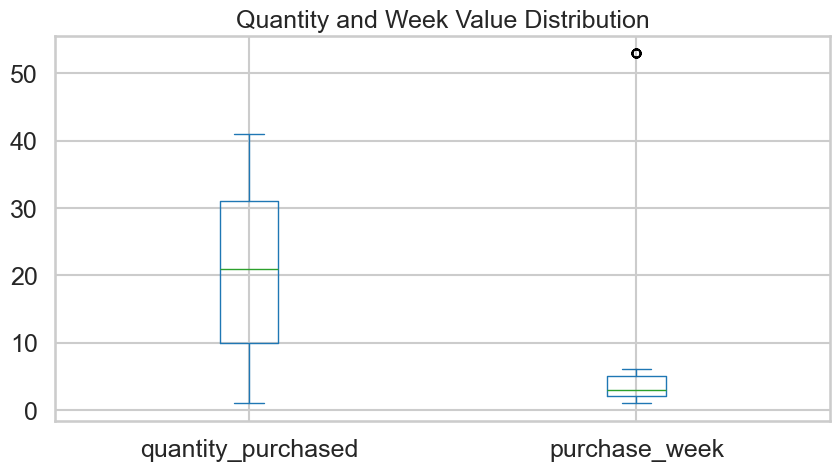

In [33]:
import matplotlib.pyplot as plt

# Plotting a box plot to visualize the distribution of quantity purchased across weeks
df[['quantity_purchased', 'purchase_week']].plot.box()

# Adding a title to the plot
plt.title('Quantity and Week Value Distribution')

# Displaying the plot
plt.show()

### Scatter plots
This scatter plot visualizes the relationship between the purchase week and the average price 
of transactions. It helps in understanding whether there are any trends or patterns in the 
average price of purchases over time. This insight can be valuable for identifying seasonal 
trends or changes in purchasing behavior over different weeks

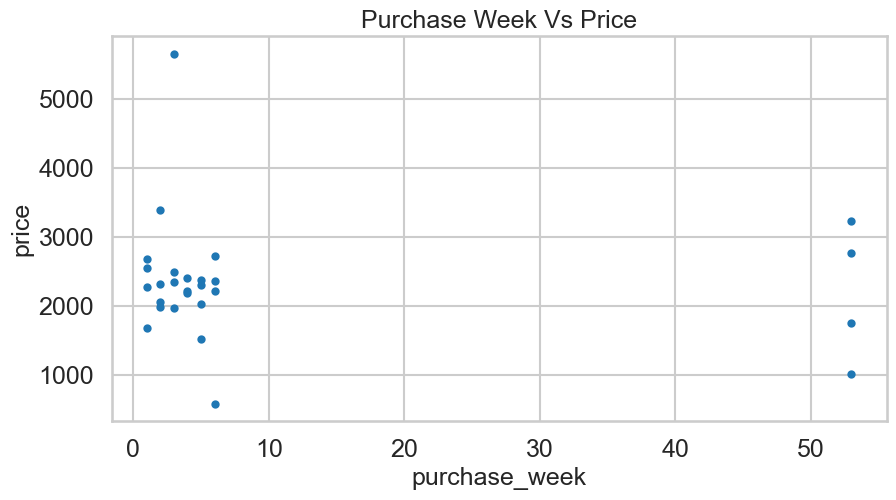

In [35]:
# Mapping user class to encoded values
uclass_map = {'new': 1, 'existing': 2, 'loyal_existing': 3, 'error': 0}
df['enc_uclass'] = df.user_class.map(uclass_map)

# Grouping data by purchase week and encoded user class, then aggregating mean price and total transactions
bubble_df = df[['enc_uclass', 'purchase_week', 'price', 'product_id']].groupby(['purchase_week', 'enc_uclass']).agg({'price': 'mean', 'product_id': 'count'}).reset_index()
bubble_df.rename(columns={'product_id': 'total_transactions'}, inplace=True)

# Plotting a scatter plot to visualize the relationship between purchase week and average price
bubble_df.plot.scatter(x='purchase_week', y='price')

# Adding a title to the plot
plt.title('Purchase Week Vs Price')

# Displaying the plot
plt.show()

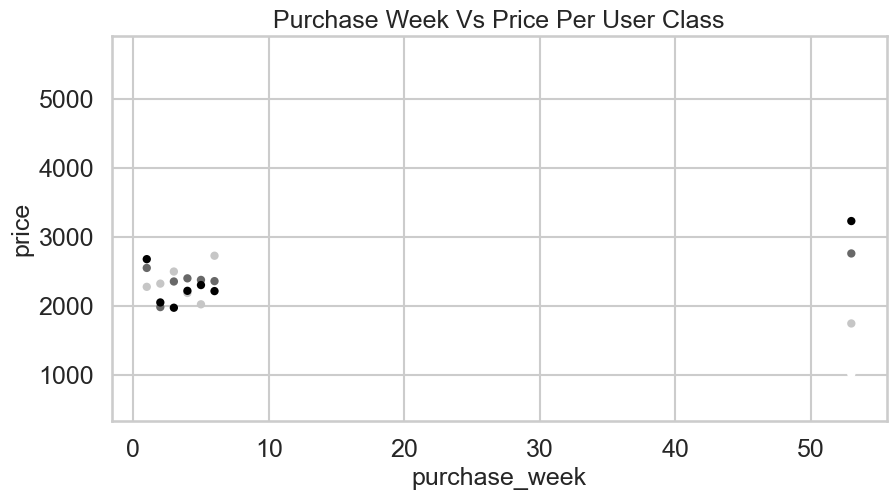

In [36]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass']) 
plt.title('Purchase Week Vs Price Per User Class')                       
plt.show() 

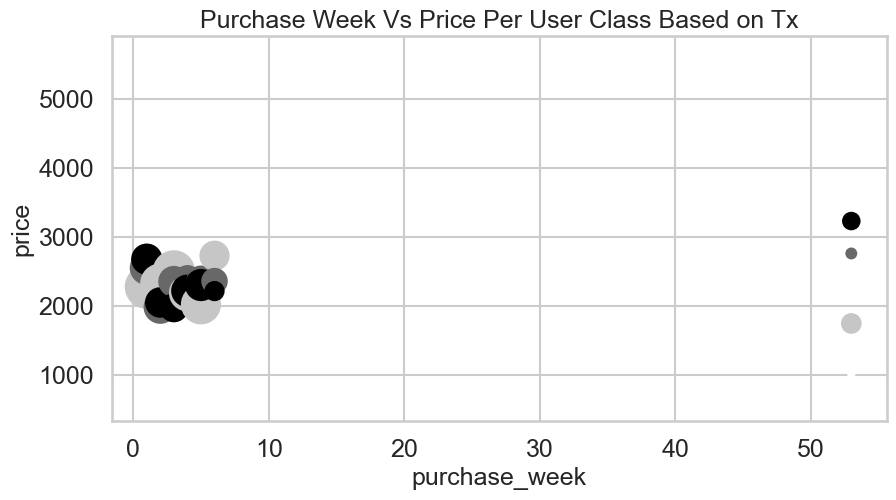

In [37]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass'],
                       s=bubble_df['total_transactions']*10)
plt.title('Purchase Week Vs Price Per User Class Based on Tx')                          
plt.show()

## Visualizing with Matplotlib module
Matplotlib is a widely-used plotting library renowned for its ability to generate high-quality visualizations suitable for publication. Since its inception in 2003, matplotlib has undergone continuous enhancement thanks to its active developer community. Moreover, it serves as the foundation and inspiration for numerous other plotting libraries. As mentioned earlier, pandas, in conjunction with SciPy, offers wrappers over matplotlib functionalities, facilitating the visualization of data. matplotlib comprises two main modules: pylab and pyplot.

### Figures and subplots

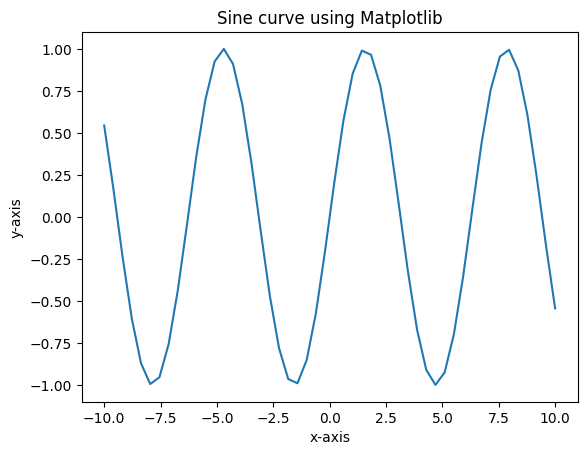

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating sample data
x = np.linspace(-10, 10, 50)
y = np.sin(x)

# Plotting the sine curve
plt.plot(x, y)

# Adding title and labels to the plot
plt.title('Sine curve using Matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Displaying the plot
plt.show()

Text(0, 0.5, 'y-axis')

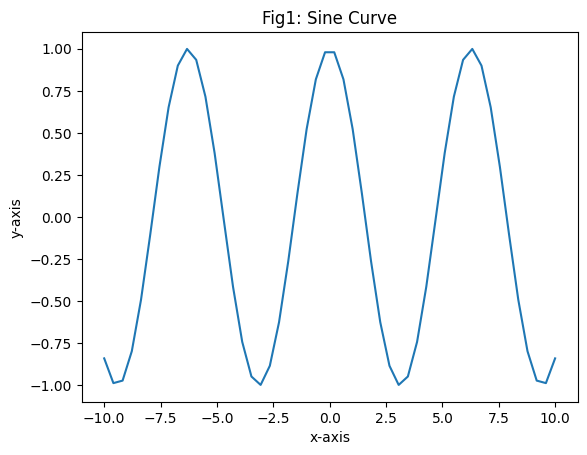

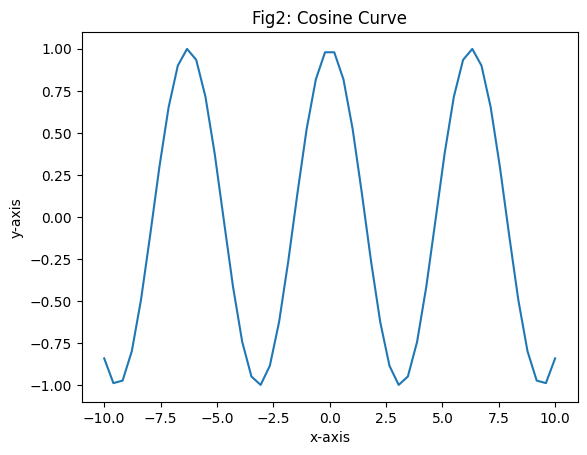

In [3]:
#Multiple figure using matplotlib

#First figure 

plt.figure(1)
plt.plot(x,y)
plt.title('Fig1: Sine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

#second figure
plt.figure(2)
y=np.cos(x)
plt.plot(x,y)
plt.title('Fig2: Cosine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')


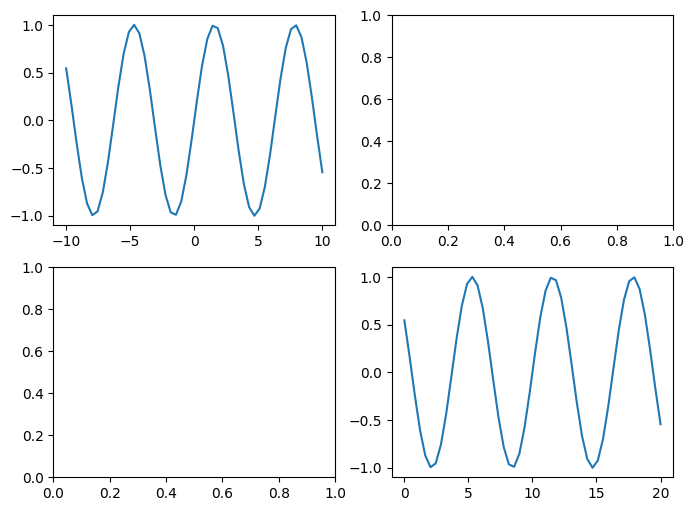

In [4]:
#subplots using add_subplot method

y = np.sin(x)
figure_obj = plt.figure(figsize=(8,6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)
ax4 = figure_obj.add_subplot(2,2,4)
ax4.plot(x+10,y)

#### The subplot2grid() function takes a number of parameters, explained as follows:
##### • shape: A tuple representing rows and columns in the grid as (rows, columns).
##### • loc: A tuple representing the location of a subplot. This parameter is 0 indexed.
##### • rowspan: This parameter represents the number of rows the subplot covers.
##### • colspan: This parameter represents the number of columns the subplot extends to.

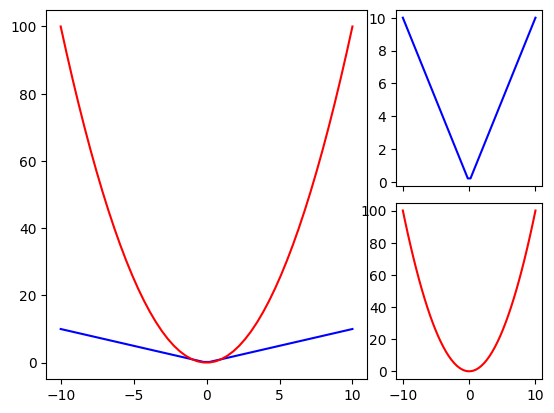

In [5]:
# subplot2grid
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0, 0), rowspan=4, colspan=2)
plt.plot(x, y,'b',x,z,'r')

ax2 = plt.subplot2grid((4,3), (0, 2),rowspan=2)
plt.plot(x, y,'b')
plt.setp(ax2.get_xticklabels(), visible=False)

plt.subplot2grid((4,3), (2, 2), rowspan=2)
plt.plot(x, z,'r')

plt.show()

### Plot formatting

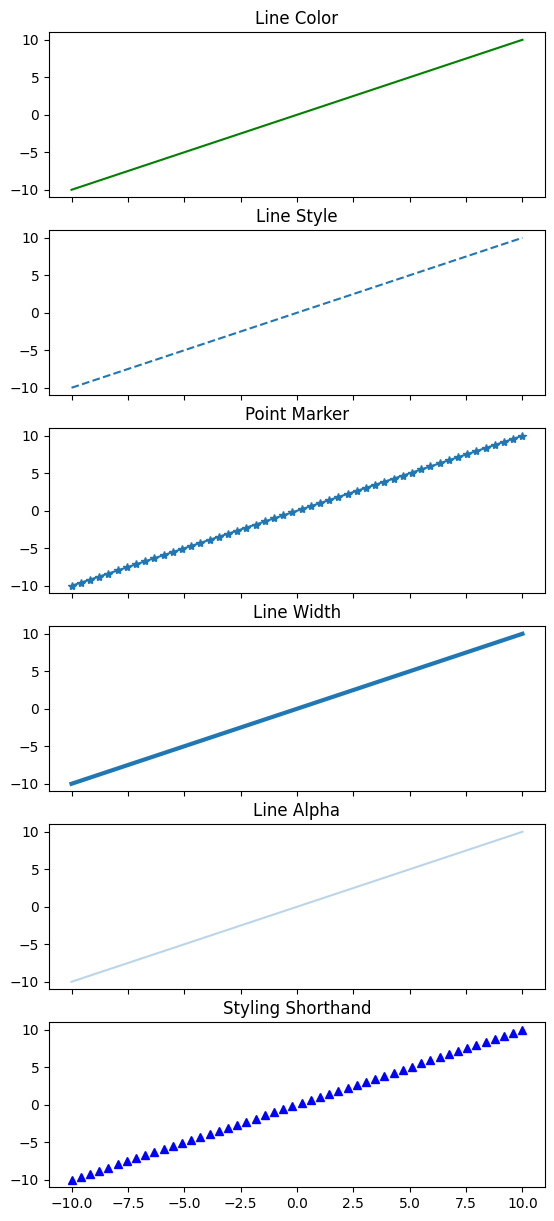

In [8]:
# color
ax1 = plt.subplot(611)
plt.plot(x,y,color='green')
ax1.set_title('Line Color')
plt.setp(ax1.get_xticklabels(), visible=False)

# linestyle
# linestyles -> '-','--','-.', ':', 'steps'
ax2 = plt.subplot(612,sharex=ax1)
plt.plot(x,y,linestyle='--')
ax2.set_title('Line Style')
plt.setp(ax2.get_xticklabels(), visible=False)

# marker
# markers -> '+', 'o', '*', 's', ',', '.', etc
ax3 = plt.subplot(613,sharex=ax1)
plt.plot(x,y,marker='*')
ax3.set_title('Point Marker')
plt.setp(ax3.get_xticklabels(), visible=False)

# line width
ax4 = plt.subplot(614,sharex=ax1)
line = plt.plot(x,y)
line[0].set_linewidth(3.0)
ax4.set_title('Line Width')
plt.setp(ax4.get_xticklabels(), visible=False)

# alpha
ax5 = plt.subplot(615,sharex=ax1)
alpha = plt.plot(x,y)
alpha[0].set_alpha(0.3)
ax5.set_title('Line Alpha')
plt.setp(ax5.get_xticklabels(), visible=False)

# combine linestyle
ax6 = plt.subplot(616,sharex=ax1)
plt.plot(x,y,'b^')
ax6.set_title('Styling Shorthand')

fig = plt.gcf()
fig.set_figheight(15)
plt.show()

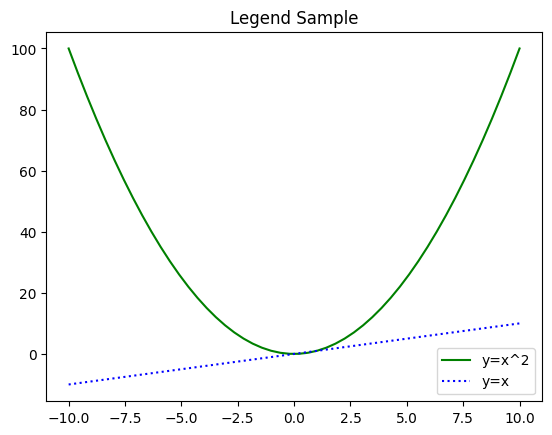

In [9]:
#Legends 

y = x**2
z = x

plt.plot(x,y,'g',label='y=x^2')
plt.plot(x,z,'b:',label='y=x')
plt.legend(loc="best")
plt.title('Legend Sample')
plt.show()

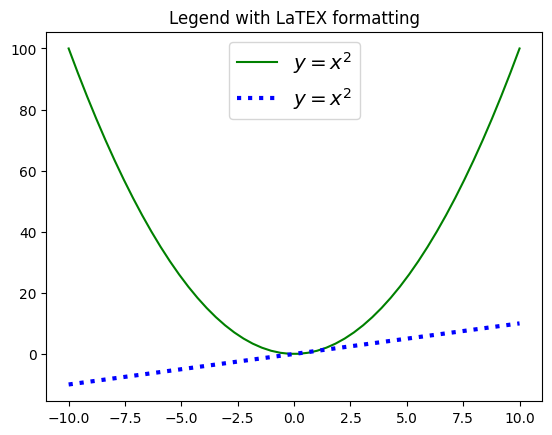

In [11]:
# legend with latex formatting, to use this object we need to use the $ symbol to start the laTEX style
plt.plot(x,y,'g',label='$y = x^2$')
plt.plot(x,z,'b:',linewidth=3,label='$y = x^2$')
plt.legend(loc="best",fontsize='x-large')
plt.title('Legend with LaTEX formatting')
plt.show()

### Axis control

#### secondary y - axis 

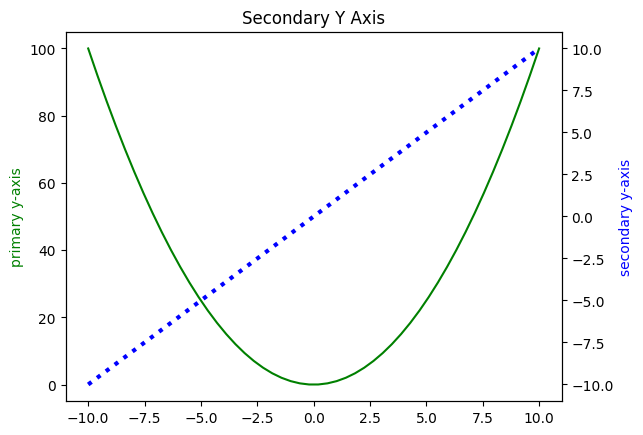

In [12]:
## axis controls
# secondary y-axis
fig, ax1 = plt.subplots()
ax1.plot(x,y,'g')
ax1.set_ylabel(r"primary y-axis", color="green")

ax2 = ax1.twinx()

ax2.plot(x,z,'b:',linewidth=3)
ax2.set_ylabel(r"secondary y-axis", color="blue")

plt.title('Secondary Y Axis')
plt.show()

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_23958/29876786.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)
/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_23958/29876786.py:3: RuntimeWarning: invalid value encountered in log2
  z = np.log2(x)
/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_23958/29876786.py:4: RuntimeWarning: invalid value encountered in log10
  w = np.log10(x)


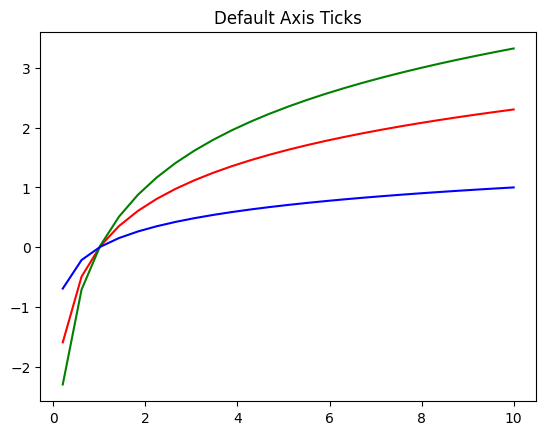

In [13]:
# ticks
y = np.log(x)
z = np.log2(x)
w = np.log10(x)

plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.title('Default Axis Ticks') 
plt.show() 

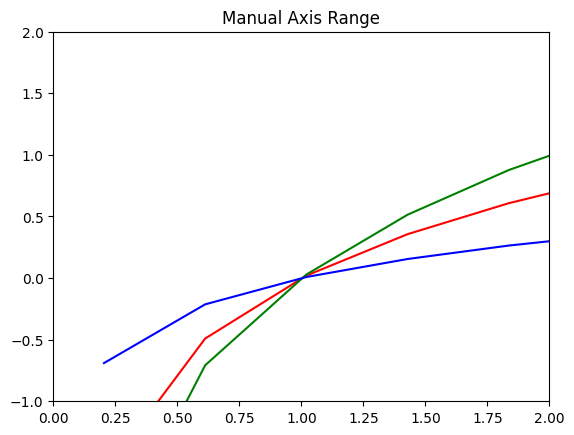

In [14]:
# manual axis using the axis function 
plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.axis([0,2,-1,2])
plt.title('Manual Axis Range') 
plt.show()

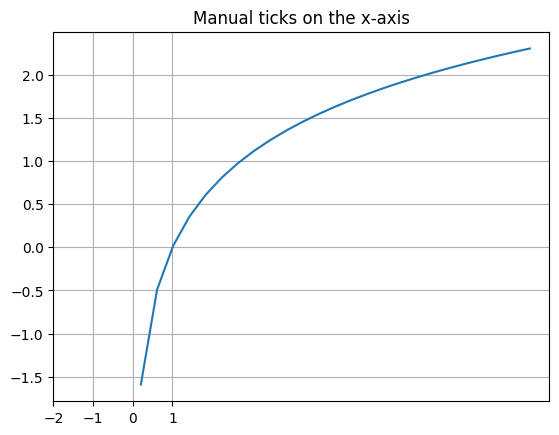

In [16]:
# Manual ticks using the set_ticks function 
plt.plot(x, y)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")
plt.show()

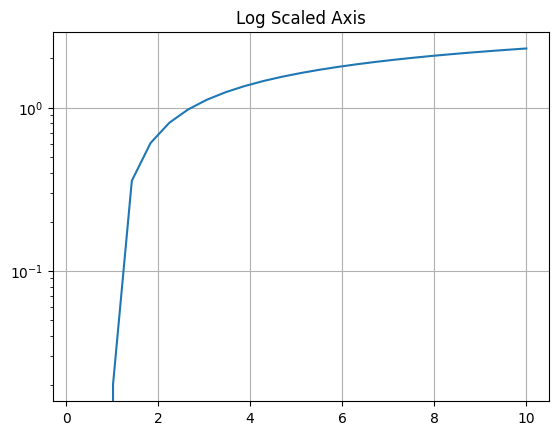

In [18]:
# using the y_scale function we can see a plot with the logit scale for the following plot
plt.plot(x, y)
ax = plt.gca()
# values: log, logit, symlog
ax.set_yscale("log")
plt.grid(True)
plt.title("Log Scaled Axis")
plt.show()

### Annotations
The text() interface from the pyplot module exposes the annotation capabilities of matplotlib.

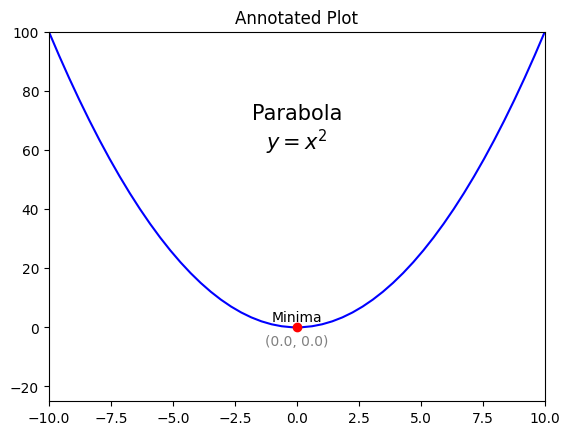

In [19]:
# annotations
y = x**2
min_x = 0
min_y = min_x**2

plt.plot(x, y, "b-", min_x, min_y, "ro")
plt.axis([-10,10,-25,100])

plt.text(0, 60, "Parabola\n$y = x^2$", fontsize=15, ha="center")
plt.text(min_x, min_y+2, "Minima", ha="center")
plt.text(min_x, min_y-6, "(%0.1f, %0.1f)"%(min_x, min_y), ha='center',color='gray')
plt.title("Annotated Plot")
plt.show()